<center><h1 style="font-family: 'Inria Serif'; font-size:38px">Shri Ramdeobaba College of Engineering and Management<br>Nagpur 440013</h1></center>
<center><h1 style="font-family: 'Inria Serif'; font-size:38px">Department of Computer Science Engineering (AIML)</h1></center>
<center><h2 style="font-family: 'Inria Serif'; font-size:32px">Data Analysis and Visualization Lab - Practical 4</h2></center>

<hr style="border:0px" />
<br>
<div class="text aim" style="font-family: 'Inria Serif'; font-size:22px">Name : Pratik Agrawal</div>
<div class="text aim" style="font-family: 'Inria Serif'; font-size:22px">Class : CSE AIML E4</div>
<div class="text aim" style="font-family: 'Inria Serif'; font-size:22px">Roll No : 57</div>

<div class="text" style="font-family: 'Inria Serif'; font-size:28px"></div>

## <div class="text" style="font-family: 'Inria Serif'; font-size:28px">A. Perform Logistic Regression on the Admissions dataset.</div>

### <div class="text" style="font-family: 'Inria Serif'; font-size:28px">Importing Libraries</div>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns

In [4]:
colors = [
    "#ffbe0b",
    "#fb5607",
    "#ff006e",
    "#8338ec",
    "#3a86ff"
]

sns.set_style('darkgrid')

## <div class="text" style="font-family: 'Inria Serif'; font-size:28px">Loading Dataset</div>

In [5]:
admissions_df = pd.read_csv('../data/Admission_Predict.csv')

admissions_df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [6]:
admissions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [7]:
admissions_df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


#### <div class="text" style="font-family: 'Inria Serif'; font-size:28px">A. Import Admission_Predict dataset, display it, visualize various columns</div>

C:\Users\SHANTANU\AppData\Local\Temp\ipykernel_7108\4140475906.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(admissions_df['GRE Score'], color=colors[0])
C:\Users\SHANTANU\AppData\Local\Temp\ipykernel_7108\4140475906.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(admissions_df['TOEFL 

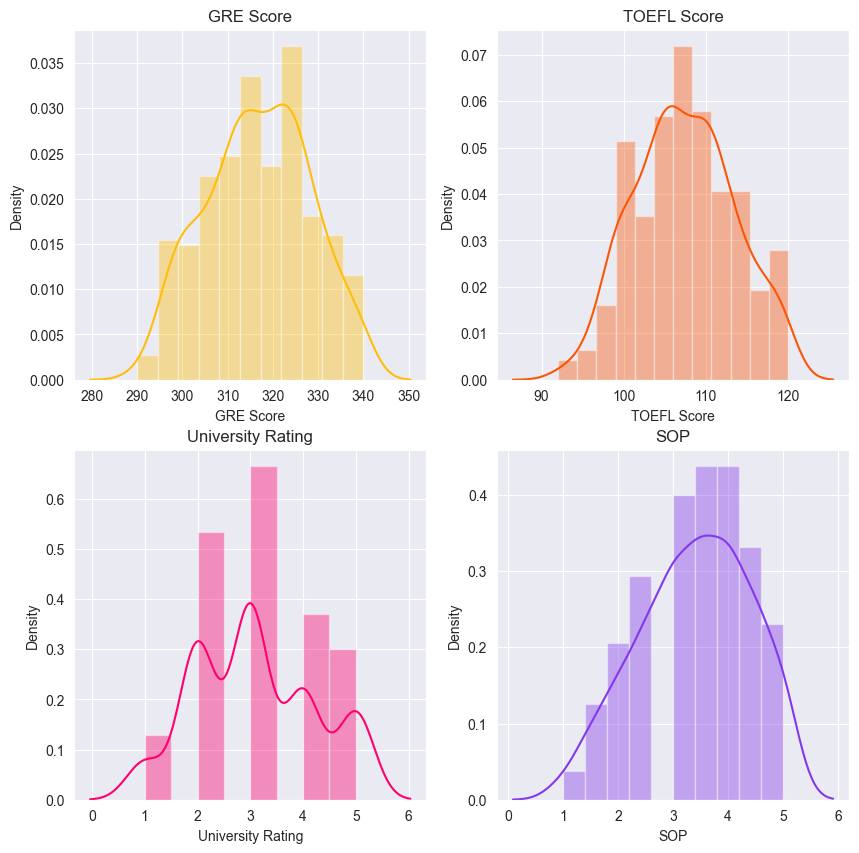

In [8]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.title('GRE Score')
sns.distplot(admissions_df['GRE Score'], color=colors[0])

plt.subplot(2, 2, 2)
plt.title('TOEFL Score')
sns.distplot(admissions_df['TOEFL Score'], color=colors[1])

plt.subplot(2, 2, 3)
plt.title('University Rating')
sns.distplot(admissions_df['University Rating'], color=colors[2])
    
plt.subplot(2, 2, 4)
plt.title('SOP')
sns.distplot(admissions_df['SOP'], color=colors[3])

plt.show()

#### <div class="text" style="font-family: 'Inria Serif'; font-size:28px">B. Plot the dataset on gpa vs. admit score.</div>

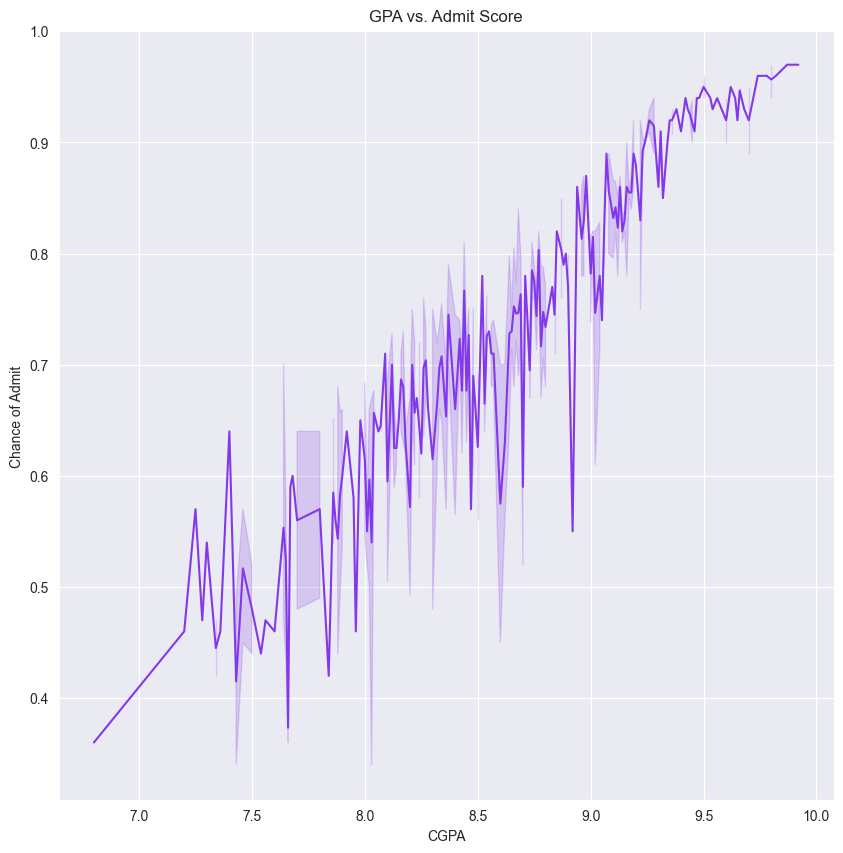

In [11]:
plt.figure(figsize=(10, 10))

plt.title('GPA vs. Admit Score')
# sns.scatterplot(x='CGPA', y='Chance of Admit ', data=admissions_df, color=colors[4])
sns.lineplot(x='CGPA', y='Chance of Admit ', data=admissions_df, color=colors[3])

plt.show()

#### <div class="text" style="font-family: 'Inria Serif'; font-size:28px">C. Find the slope and intercept of the line to fit.</div>

In [12]:
best_fit = np.polyfit(admissions_df['CGPA'], admissions_df['Chance of Admit '], 1)

print('Slope: ', best_fit[0])
print('Intercept: ', best_fit[1])


Slope:  0.20884722950069126
Intercept:  -1.0715116629342314


#### <div class="text" style="font-family: 'Inria Serif'; font-size:28px">D. Compute the log odds for each entry. Merge the results with the data as a new column</div>

In [14]:
log_odds = np.log(admissions_df['Chance of Admit ']/(1 - admissions_df['Chance of Admit ']))

admissions_df['Log Odds'] = log_odds

admissions_df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Log Odds
0,1,337,118,4,4.5,4.5,9.65,1,0.92,2.442347
1,2,324,107,4,4.0,4.5,8.87,1,0.76,1.152680
2,3,316,104,3,3.0,3.5,8.00,1,0.72,0.944462
3,4,322,110,3,3.5,2.5,8.67,1,0.80,1.386294
4,5,314,103,2,2.0,3.0,8.21,0,0.65,0.619039
...,...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82,1.516347
396,397,325,107,3,3.0,3.5,9.11,1,0.84,1.658228
397,398,330,116,4,5.0,4.5,9.45,1,0.91,2.313635
398,399,312,103,3,3.5,4.0,8.78,0,0.67,0.708185


#### <div class="text" style="font-family: 'Inria Serif'; font-size:28px">E. Using the log odds compute the probability for each entry.</div>

In [15]:
admissions_df['Probability'] = 1 / (1 + np.exp(-admissions_df['Log Odds']))

admissions_df[['Chance of Admit ', 'Log Odds', 'Probability']]

,Chance of Admit,Log Odds,Probability
0,0.92,2.442347,0.92
1,0.76,1.152680,0.76
2,0.72,0.944462,0.72
3,0.80,1.386294,0.80
4,0.65,0.619039,0.65
...,...,...,...
395,0.82,1.516347,0.82
396,0.84,1.658228,0.84
397,0.91,2.313635,0.91
398,0.67,0.708185,0.67


#### <div class="text" style="font-family: 'Inria Serif'; font-size:28px">F. Plot the probability vs. gpa.</div>

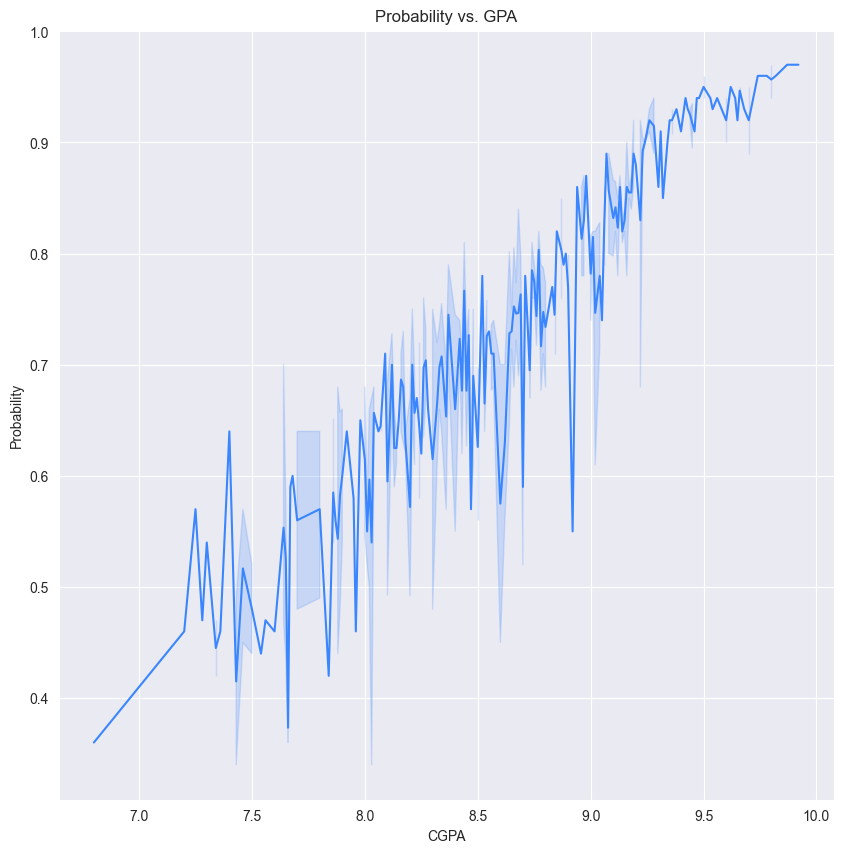

In [16]:
plt.figure(figsize=(10, 10))

plt.title('Probability vs. GPA')
sns.lineplot(x='CGPA', y='Probability', data=admissions_df, color=colors[4])

plt.show()

#### <div class="text" style="font-family: 'Inria Serif'; font-size:28px">G. Show the decision boundary of the regression model.</div>

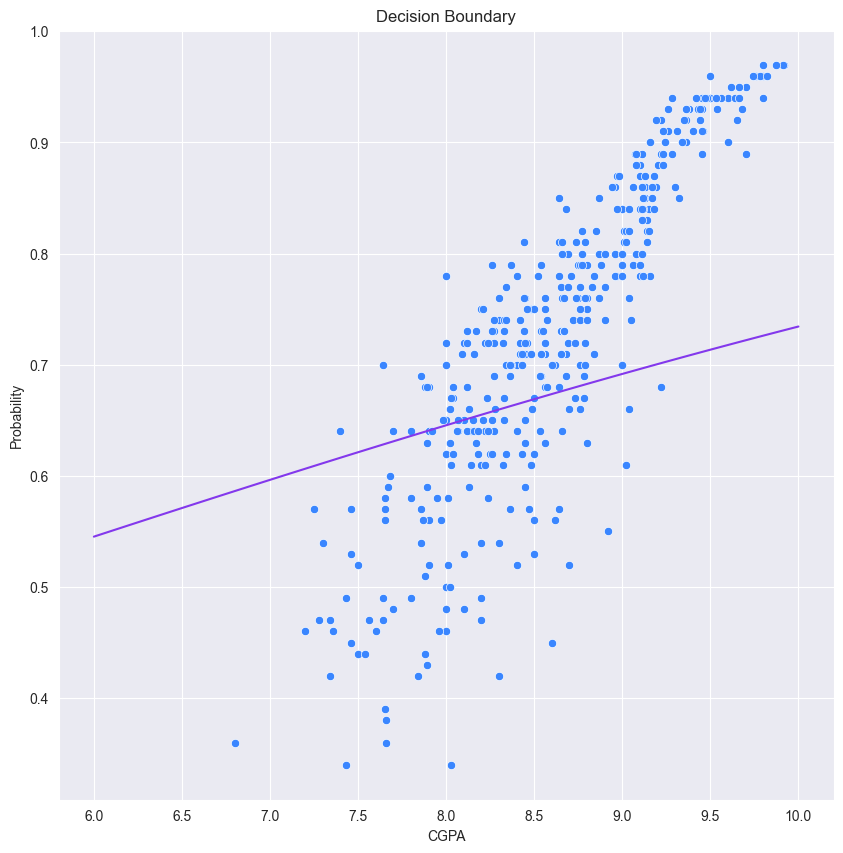

In [17]:
plt.figure(figsize=(10, 10))

plt.title('Decision Boundary')
sns.scatterplot(x='CGPA', y='Probability', data=admissions_df, color=colors[4])

x = np.linspace(6, 10, 100)
y = 1 / (1 + np.exp(-(best_fit[0] * x + best_fit[1])))
sns.lineplot(x=x, y=y, color=colors[3])

plt.show()

#### <div class="text" style="font-family: 'Inria Serif'; font-size:28px">H. Compute the accuracy of the model.</div>

In [18]:
admissions_df['Prediction'] = admissions_df['Probability'].apply(lambda x: 1 if x >= 0.5 else 0)

admissions_df[['Chance of Admit ', 'Probability', 'Prediction']]

,Chance of Admit,Probability,Prediction
0,0.92,0.92,1
1,0.76,0.76,1
2,0.72,0.72,1
3,0.80,0.80,1
4,0.65,0.65,1
...,...,...,...
395,0.82,0.82,1
396,0.84,0.84,1
397,0.91,0.91,1
398,0.67,0.67,1


In [21]:
# convert chance of admit to 1 or 0

admissions_df['Chance of Admit '] = admissions_df['Chance of Admit '].apply(lambda x: 1 if x >= 0.5 else 0)

accuracy_score(admissions_df['Chance of Admit '], admissions_df['Prediction']) * 100

100.0

## <div class="text" style="font-family: 'Inria Serif'; font-size:28px">B. Perform Logistic Regression on the Credit Card dataset.</div>

In [22]:
credit_df = pd.read_csv('../data/creditcard.csv')

credit_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [23]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [24]:
credit_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


#### <div class="text" style="font-family: 'Inria Serif'; font-size:28px">A. Import CreditCard dataset, display it, visualize various columns</div>

C:\Users\SHANTANU\AppData\Local\Temp\ipykernel_7108\1125176050.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(credit_df['Time'], color=colors[0])
C:\Users\SHANTANU\AppData\Local\Temp\ipykernel_7108\1125176050.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(credit_df['V1'], color=colors[

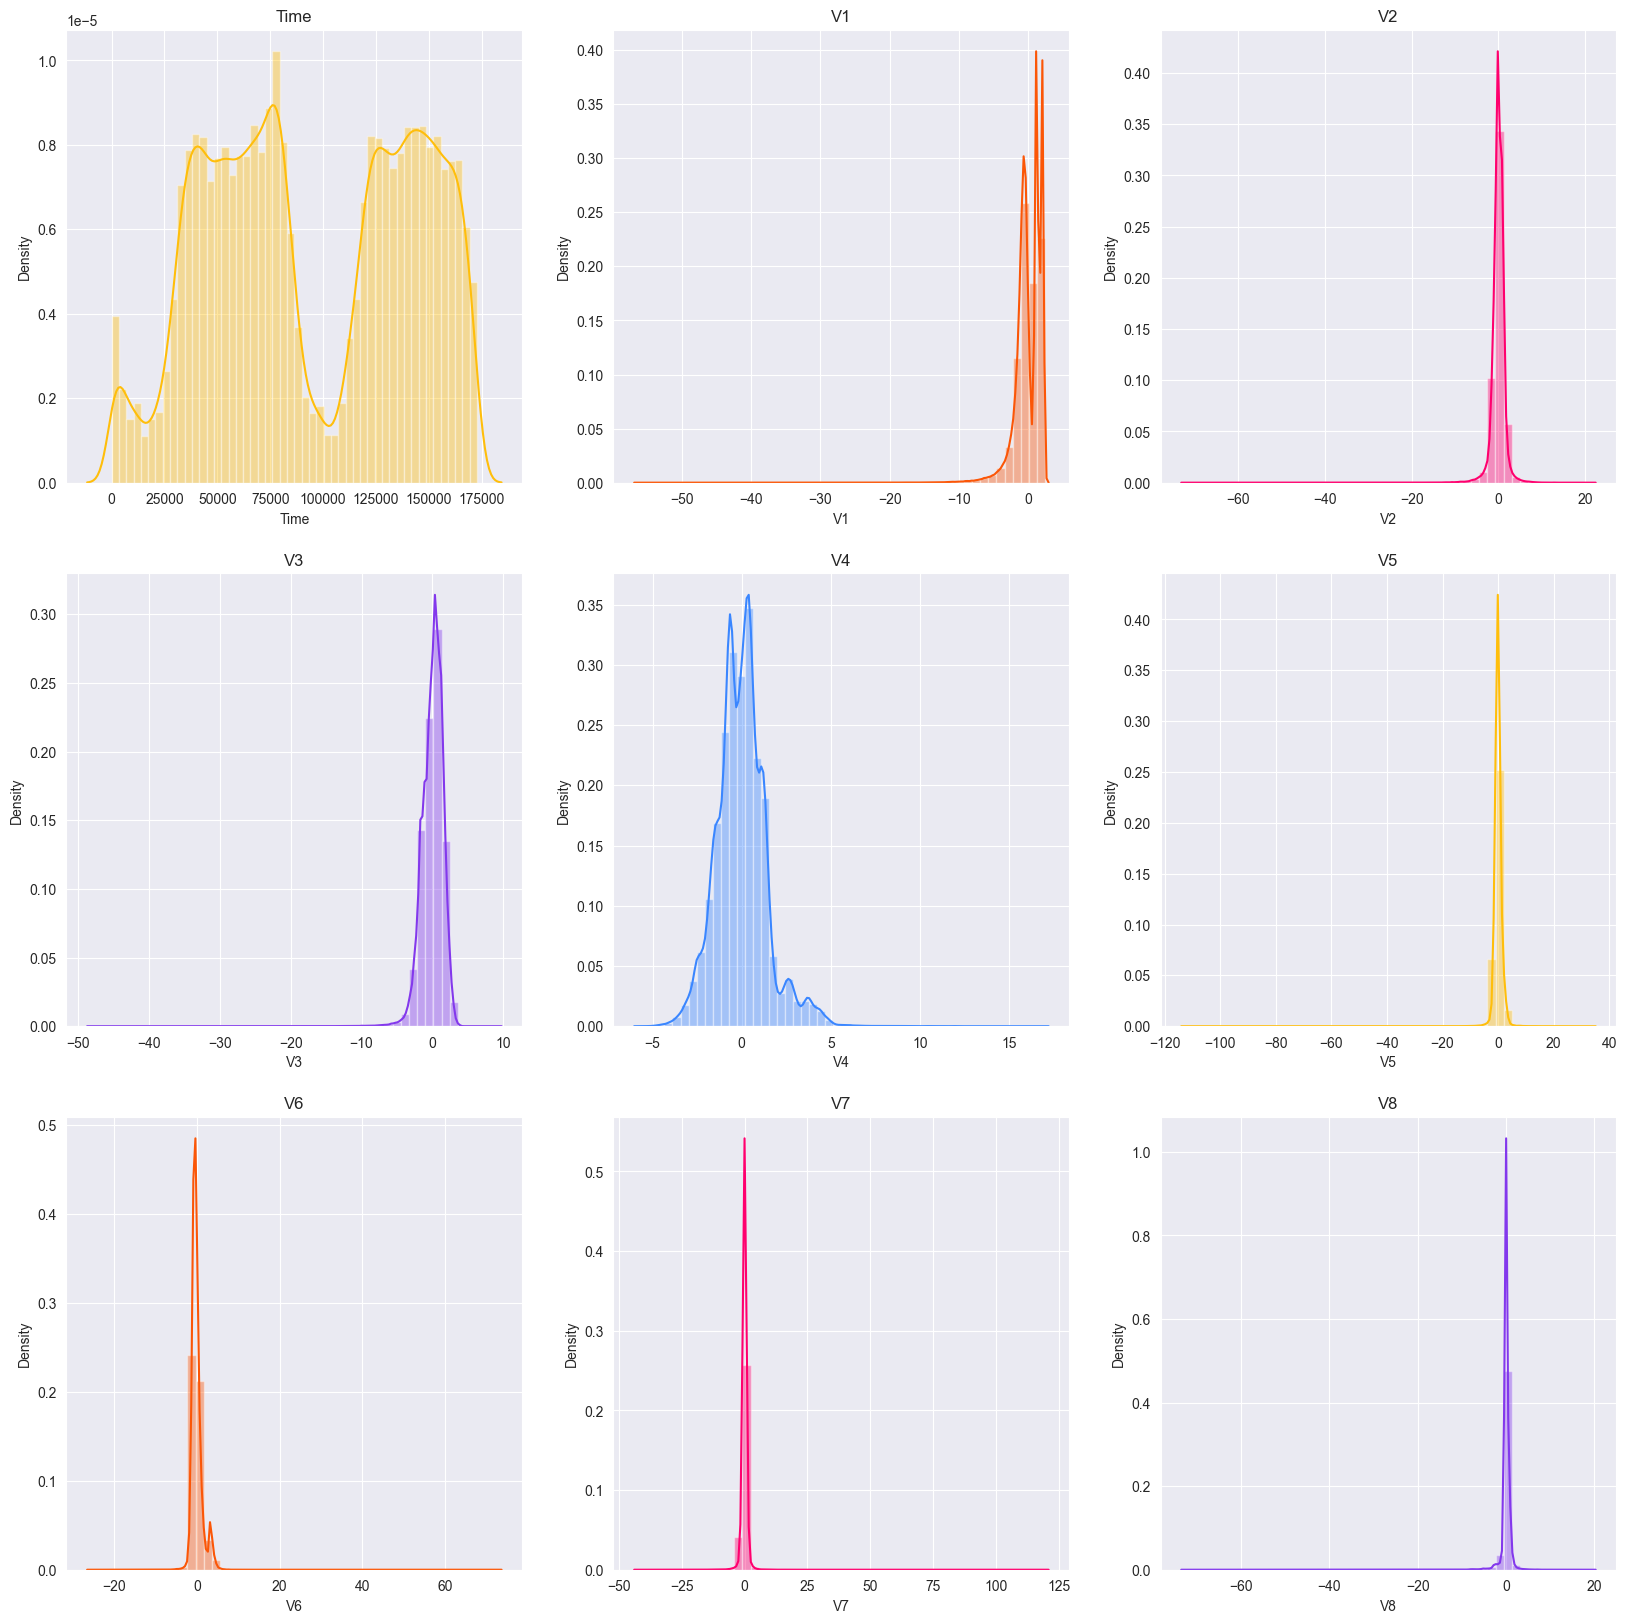

In [25]:
plt.figure(figsize=(20, 20))

plt.subplot(3, 3, 1)
plt.title('Time')
sns.distplot(credit_df['Time'], color=colors[0])

plt.subplot(3, 3, 2)
plt.title('V1')
sns.distplot(credit_df['V1'], color=colors[1])

plt.subplot(3, 3, 3)
plt.title('V2')
sns.distplot(credit_df['V2'], color=colors[2])

plt.subplot(3, 3, 4)
plt.title('V3')
sns.distplot(credit_df['V3'], color=colors[3])  

plt.subplot(3, 3, 5)
plt.title('V4')
sns.distplot(credit_df['V4'], color=colors[4])

plt.subplot(3, 3, 6)
plt.title('V5')
sns.distplot(credit_df['V5'], color=colors[0])

plt.subplot(3, 3, 7)
plt.title('V6')
sns.distplot(credit_df['V6'], color=colors[1])

plt.subplot(3, 3, 8)
plt.title('V7')
sns.distplot(credit_df['V7'], color=colors[2])

plt.subplot(3, 3, 9)
plt.title('V8')
sns.distplot(credit_df['V8'], color=colors[3])

plt.show()

C:\Users\SHANTANU\AppData\Local\Temp\ipykernel_7108\1475163987.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(credit_df['V9'], color=colors[4])
C:\Users\SHANTANU\AppData\Local\Temp\ipykernel_7108\1475163987.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(credit_df['V10'], color=colors[0

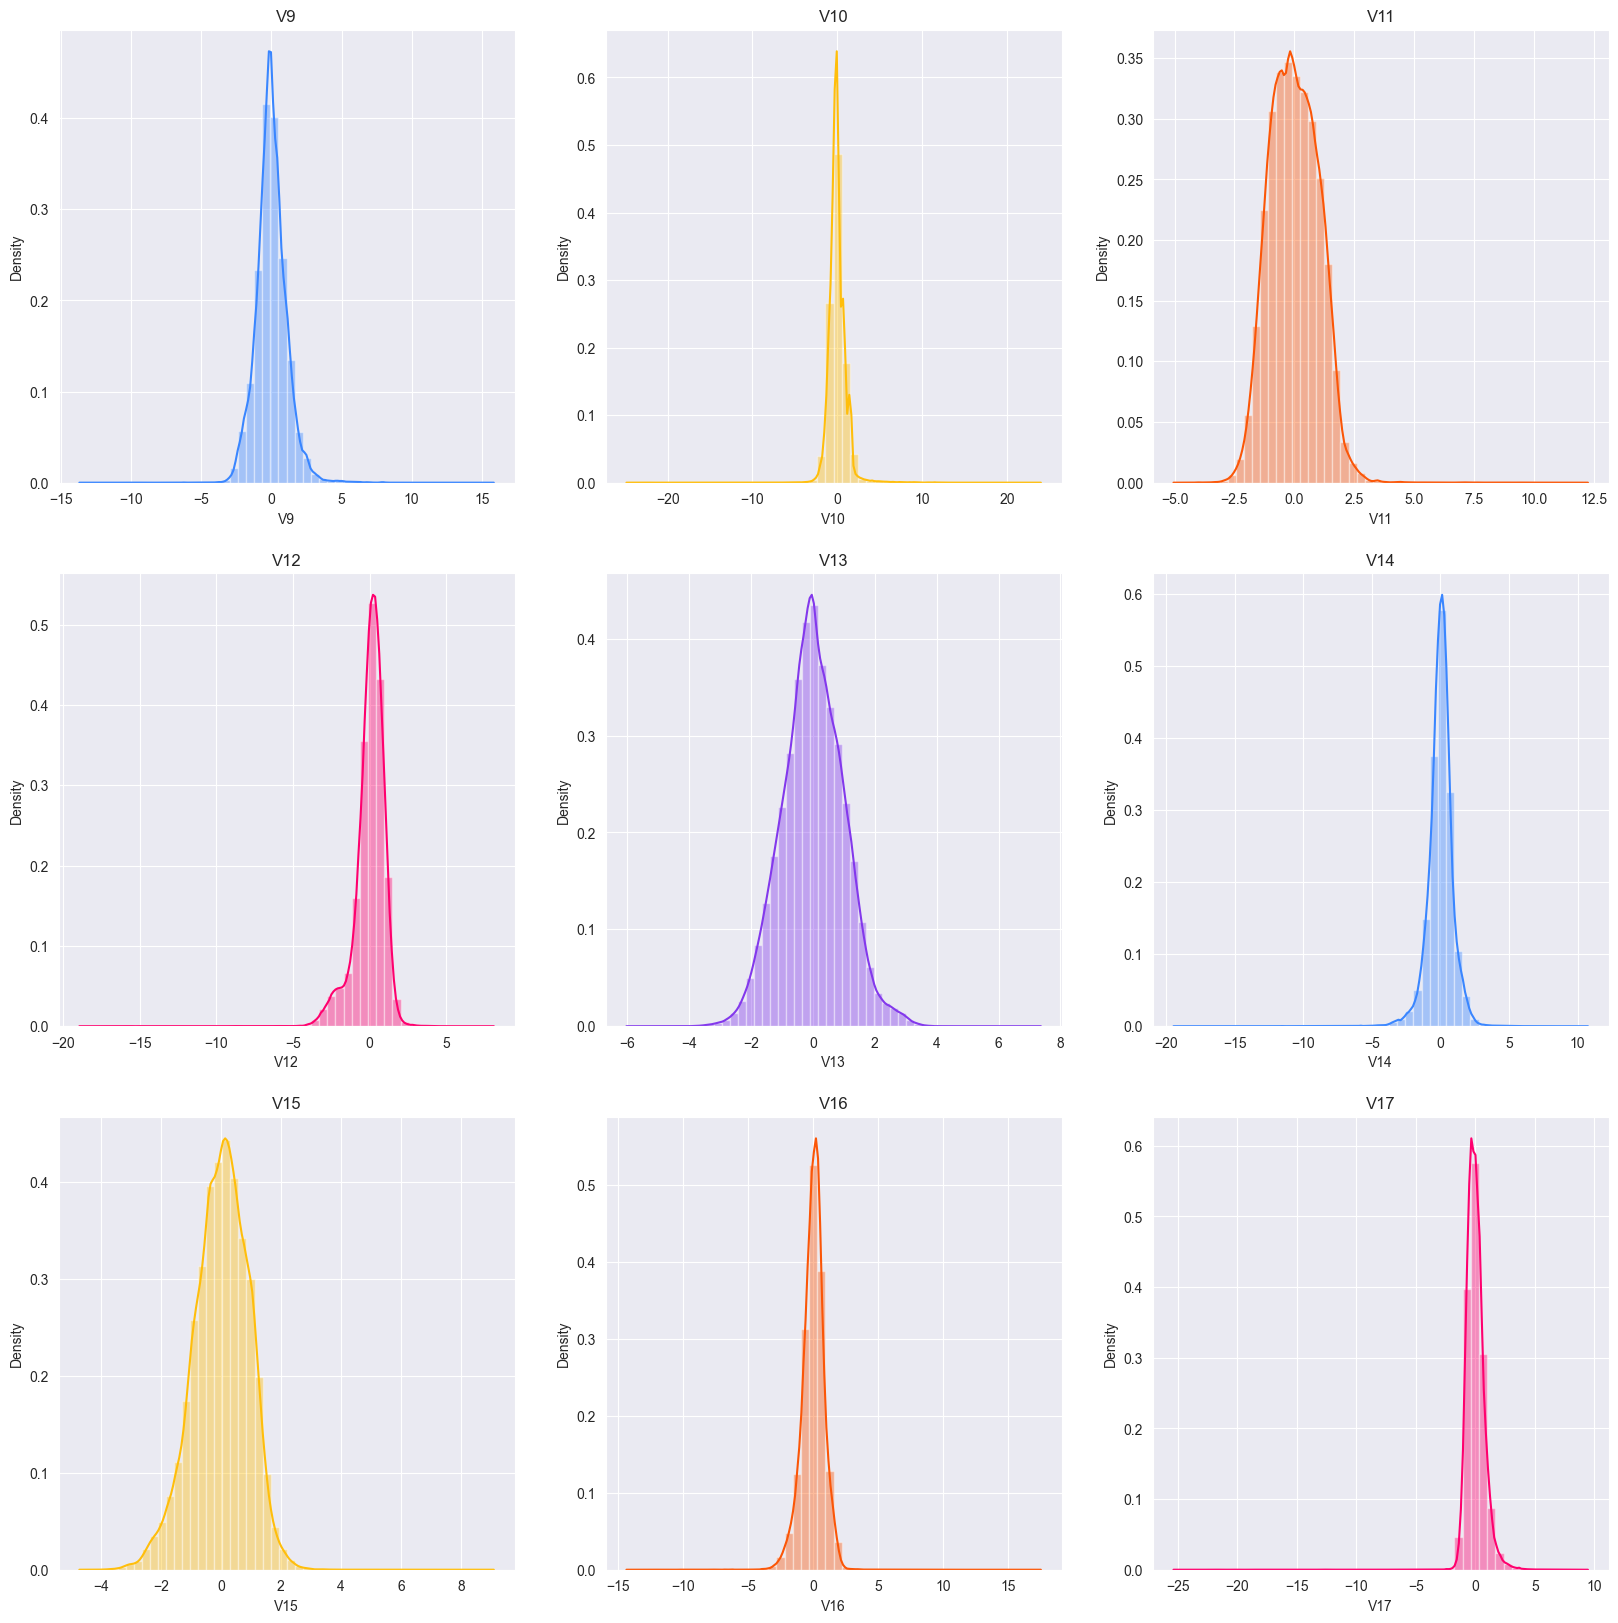

In [26]:
plt.figure(figsize=(20, 20))

plt.subplot(3, 3, 1)
plt.title('V9')
sns.distplot(credit_df['V9'], color=colors[4])

plt.subplot(3, 3, 2)
plt.title('V10')
sns.distplot(credit_df['V10'], color=colors[0])

plt.subplot(3, 3, 3)
plt.title('V11')
sns.distplot(credit_df['V11'], color=colors[1])

plt.subplot(3, 3, 4)
plt.title('V12')
sns.distplot(credit_df['V12'], color=colors[2])

plt.subplot(3, 3, 5)
plt.title('V13')
sns.distplot(credit_df['V13'], color=colors[3])

plt.subplot(3, 3, 6)
plt.title('V14')
sns.distplot(credit_df['V14'], color=colors[4])

plt.subplot(3, 3, 7)
plt.title('V15')
sns.distplot(credit_df['V15'], color=colors[0])

plt.subplot(3, 3, 8)
plt.title('V16')
sns.distplot(credit_df['V16'], color=colors[1])

plt.subplot(3, 3, 9)
plt.title('V17')
sns.distplot(credit_df['V17'], color=colors[2])

plt.show()

#### <div class="text" style="font-family: 'Inria Serif'; font-size:28px">B. Preprocess the data.</div>

##### <div class="text" style="font-family: 'Inria Serif'; font-size:28px">1. Check duplicate data. If found remove it.</div>
##### <div class="text" style="font-family: 'Inria Serif'; font-size:28px">2. Remove such colums which are not important. For example: Time</div>
##### <div class="text" style="font-family: 'Inria Serif'; font-size:28px">3. Separate the dataset into feature column and target column. The class column is the target column and everything else is a feature</div>
##### <div class="text" style="font-family: 'Inria Serif'; font-size:28px">4. Scale the dataset using standard scaling mechanism.</div>
##### <div class="text" style="font-family: 'Inria Serif'; font-size:28px">5. Split the dataset into training and testing dataset.</div>

In [27]:
credit_df.drop_duplicates(inplace=True)

credit_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [28]:
credit_df.drop(columns=['Time'], inplace=True)

credit_df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [29]:
y = credit_df['Class']
X = credit_df.drop(columns=['Class'])

X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [30]:
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 283726, dtype: int64

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X)

X

array([[-0.70108232, -0.04168726,  1.68010106, ...,  0.33303251,
        -0.06584955,  0.24419951],
       [ 0.60879165,  0.16413764,  0.10927902, ..., -0.0271543 ,
         0.0432187 , -0.34258399],
       [-0.7003364 , -0.81133678,  1.17426962, ..., -0.14432548,
        -0.18382429,  1.15889967],
       ...,
       [ 0.98235398, -0.18043304, -2.15503257, ...,  0.00680174,
        -0.08264021, -0.0822395 ],
       [-0.12646526,  0.32465977,  0.46457662, ...,  0.27052318,
         0.31700384, -0.31339058],
       [-0.27686005, -0.1127094 ,  0.46512487, ..., -0.01055821,
         0.03994074,  0.51329005]])

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train

array([[-0.6980468 , -0.65397418,  1.18379975, ..., -0.45138598,
        -0.28543005,  0.9166463 ],
       [-0.03380515,  0.35626362, -0.90894781, ..., -0.31135521,
        -0.60074555, -0.22025922],
       [-0.18895134,  0.43681305,  1.18092697, ...,  0.07390511,
         0.17507812, -0.27349426],
       ...,
       [ 0.64341806, -0.02753938, -0.47948526, ...,  0.11161386,
         0.07477038, -0.33535553],
       [ 1.01486787, -0.07912323, -0.77073758, ..., -0.18553141,
        -0.17151729, -0.19565848],
       [-0.24181823,  0.49952515,  0.87810464, ..., -0.33515595,
        -0.14690524, -0.35332685]])

In [33]:
X_test

array([[ 0.53821851, -0.46190662,  0.10509521, ...,  0.25321131,
         0.12073628, -0.12800645],
       [-2.46970996,  2.64488125, -0.60831227, ...,  1.086745  ,
        -1.33156081, -0.31410944],
       [-0.79863063, -0.15607481,  1.03048777, ..., -1.27364037,
        -0.76021332, -0.16930055],
       ...,
       [ 1.01165578, -0.18433127, -0.62640082, ..., -0.2156806 ,
        -0.18204022, -0.22161705],
       [-1.46502341, -1.41608264,  1.13428186, ...,  0.64751646,
        -1.09528236,  0.0131283 ],
       [-0.03677101,  0.47755417, -0.28735411, ...,  1.46072084,
         0.95997982, -0.3153874 ]])

In [34]:
y_train

79119     0
265736    0
42801     0
172689    0
179949    0
         ..
120348    0
260136    0
132427    0
147428    0
122429    0
Name: Class, Length: 226980, dtype: int64

In [35]:
y_test

104697    0
134356    0
42637     0
882       0
263275    0
         ..
154645    0
107561    0
185406    0
59492     0
263579    0
Name: Class, Length: 56746, dtype: int64

#### <div class="text" style="font-family: 'Inria Serif'; font-size:28px">C. Plot histograms/heatmaps to understand the values of each variable.</div>

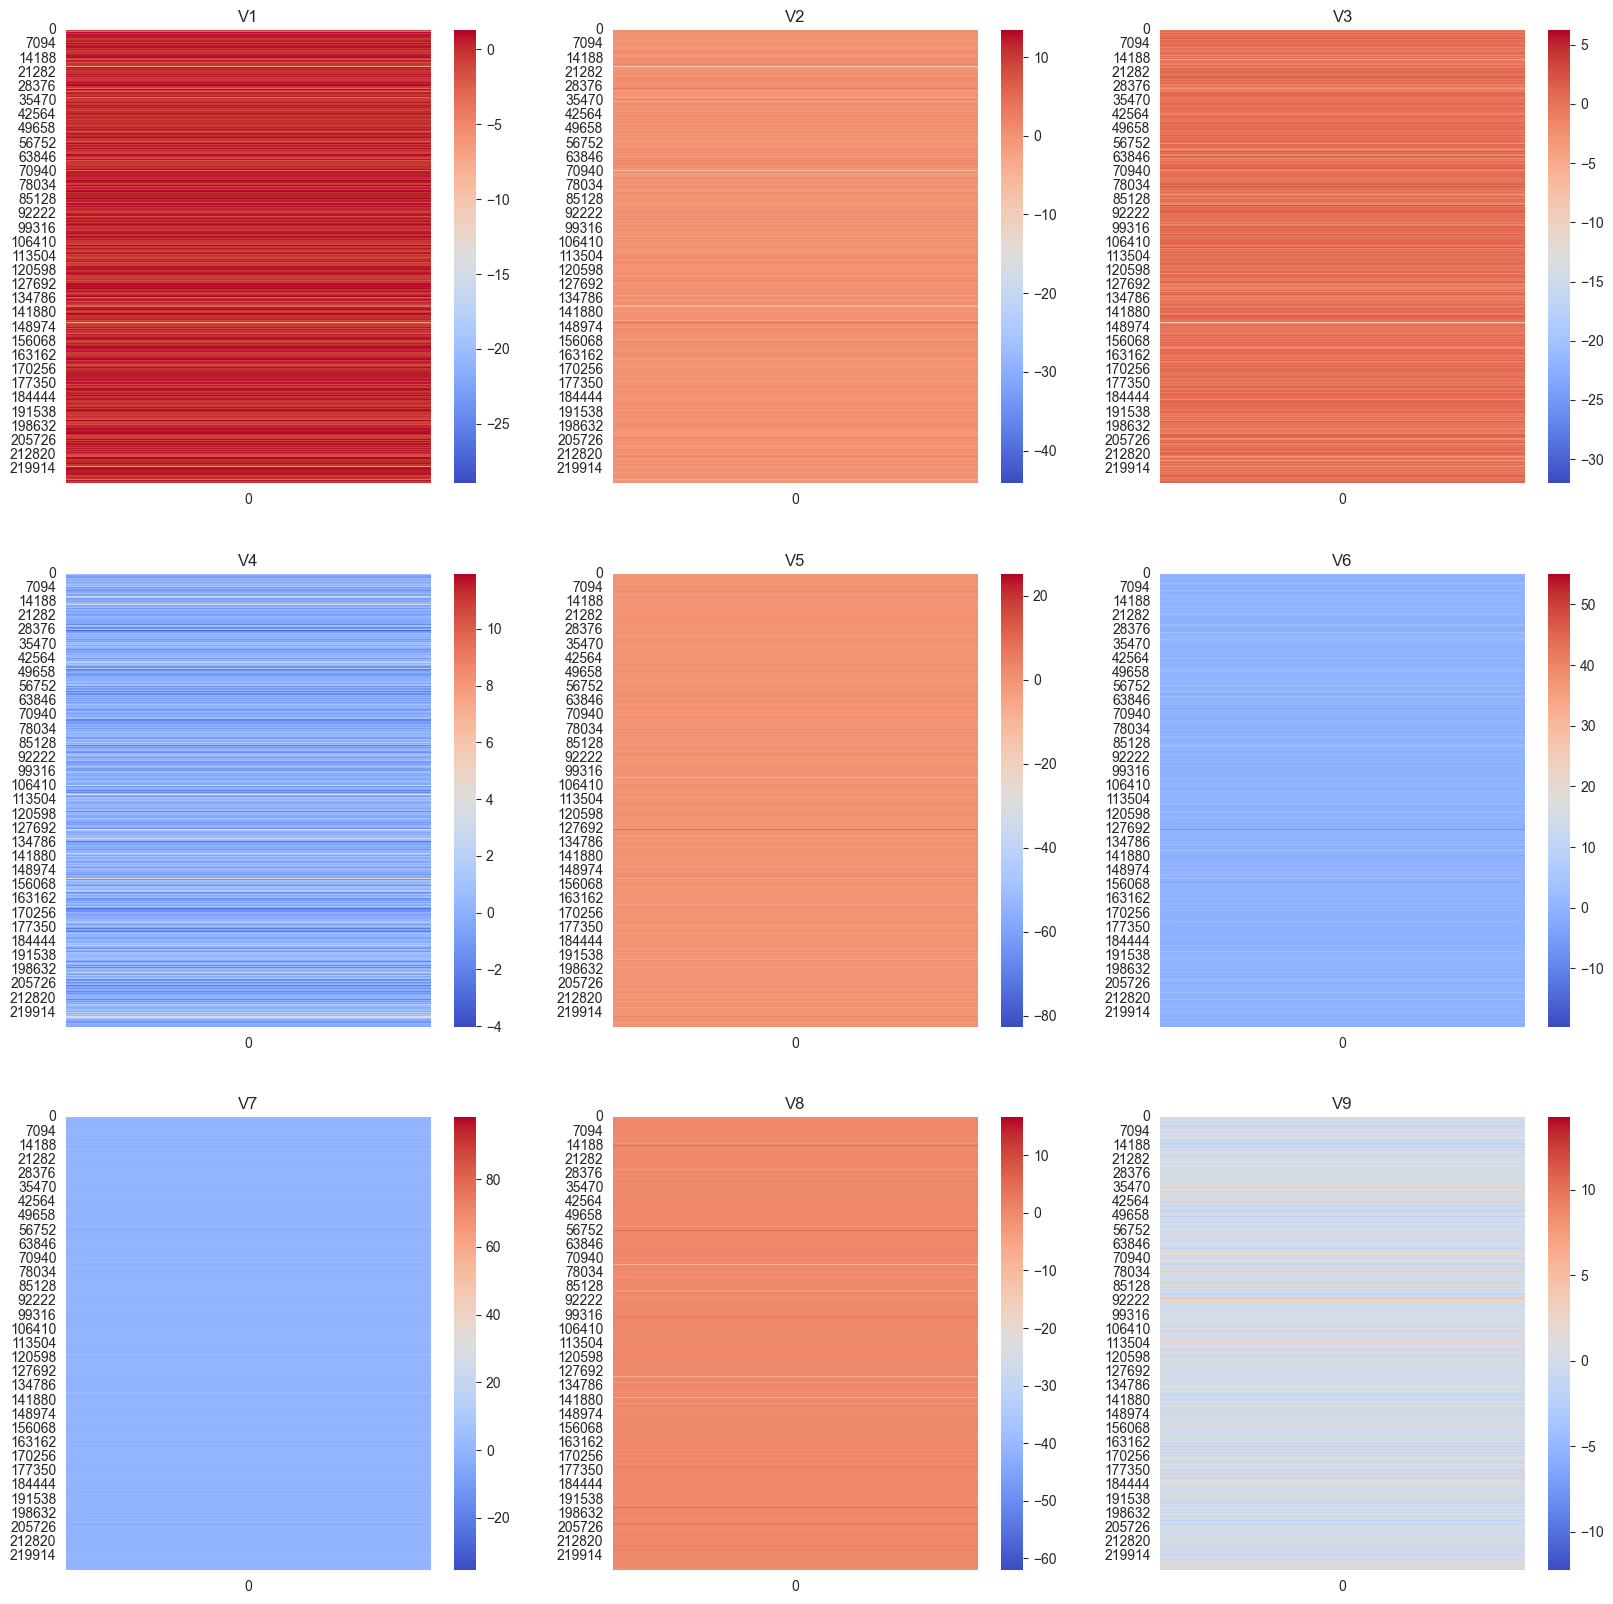

In [36]:
plt.figure(figsize=(20, 20))

plt.subplot(3, 3, 1)
plt.title('V1')
sns.heatmap(pd.DataFrame(X_train[:, 0]), cmap='coolwarm')

plt.subplot(3, 3, 2)
plt.title('V2')
sns.heatmap(pd.DataFrame(X_train[:, 1]), cmap='coolwarm')

plt.subplot(3, 3, 3)
plt.title('V3')
sns.heatmap(pd.DataFrame(X_train[:, 2]), cmap='coolwarm')

plt.subplot(3, 3, 4)
plt.title('V4')
sns.heatmap(pd.DataFrame(X_train[:, 3]), cmap='coolwarm')

plt.subplot(3, 3, 5)
plt.title('V5')
sns.heatmap(pd.DataFrame(X_train[:, 4]), cmap='coolwarm')

plt.subplot(3, 3, 6)
plt.title('V6')
sns.heatmap(pd.DataFrame(X_train[:, 5]), cmap='coolwarm')

plt.subplot(3, 3, 7)
plt.title('V7')
sns.heatmap(pd.DataFrame(X_train[:, 6]), cmap='coolwarm')

plt.subplot(3, 3, 8)
plt.title('V8')
sns.heatmap(pd.DataFrame(X_train[:, 7]), cmap='coolwarm')

plt.subplot(3, 3, 9)
plt.title('V9')
sns.heatmap(pd.DataFrame(X_train[:, 8]), cmap='coolwarm')

plt.show()

#### <div class="text" style="font-family: 'Inria Serif'; font-size:28px">D. Perform Logistic Regression on the dataset.</div>

In [37]:
logistic_regression = LogisticRegression()

logistic_regression.fit(X_train, y_train)

LogisticRegression()

In [38]:
y_pred = logistic_regression.predict(X_test)

y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [39]:
accuracy_score(y_test, y_pred) * 100

99.91717477883904

In [40]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[56650,     6],
       [   41,    49]], dtype=int64)

In [41]:
from sklearn.metrics import classification_report


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.89      0.54      0.68        90

    accuracy                           1.00     56746
   macro avg       0.95      0.77      0.84     56746
weighted avg       1.00      1.00      1.00     56746


In [42]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred)

0.7721692710784774

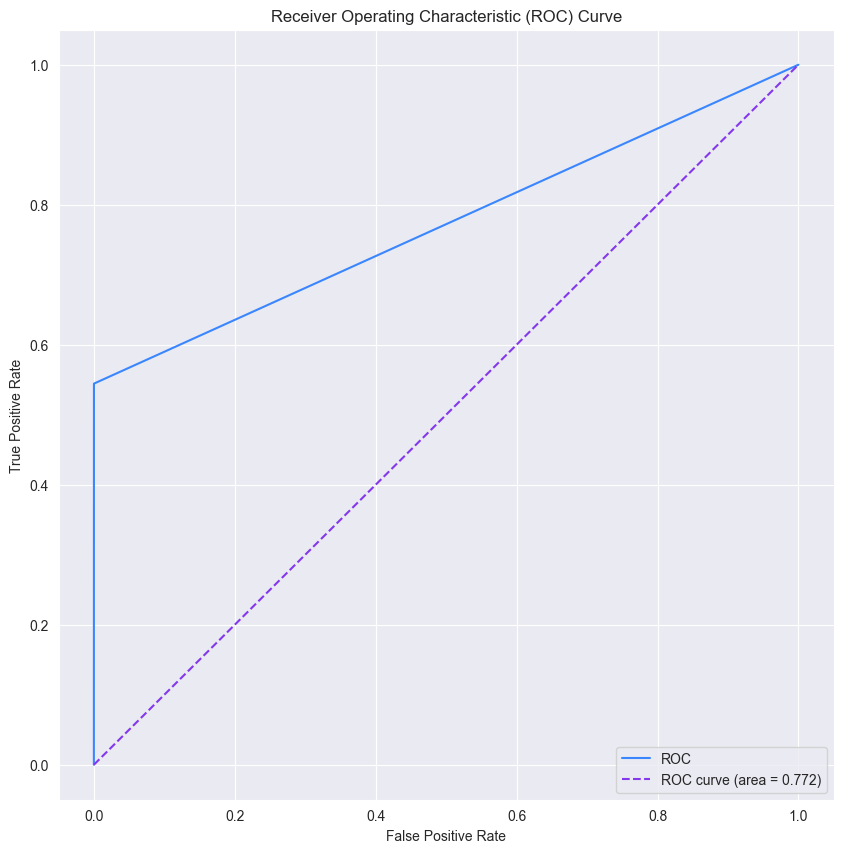

In [43]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize=(10, 10))

plt.plot(fpr, tpr, color=colors[4], label='ROC')
plt.plot([0, 1], [0, 1], color=colors[3], linestyle='--', label='ROC curve (area = %0.3f)' % roc_auc_score(y_test, y_pred))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Receiver Operating Characteristic (ROC) Curve')

plt.legend(loc="lower right")

plt.show()